# Plot Performance Histograms
Use this notebook to plot histograms of subject performance, with one summary value per session. This is to see if an alternate representation of subject performance is more useful than seeing each individual run, as we do not see learning necessarily in most subjects between runs.

## WARNING
Before running this notebook, make sure you have organized all subject data into the stats running format by using `ANOVAs.ipynb`

Nile Wilson, 2019.04.09

In [1]:
from scipy.stats import sem
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
import pandas as pd
import datetime
import pickle
import glob
import csv
import os

## Load Performance Data
Load in the data organized and saved through the `ANOVAs.ipynb` notebook

In [2]:
data_files = glob.glob('*_all_scores_for_2-way_ANOVA_sessions.sav.mat')
data_files

['2019-04-06-11-57-32_all_scores_for_2-way_ANOVA_sessions.sav.mat']

Load in the data

In [3]:
# Load in the most recent file
mat_contents = sio.loadmat(data_files[-1])

Organize and save into dataframe

In [4]:
all_scores = mat_contents['all_scores_export']
all_scores = all_scores[0]
AdaptationScheme = mat_contents['AdaptationScheme']
SessionNumber = mat_contents['SessionNumber']
RunNumber = mat_contents['RunNumber']
Subjects = mat_contents['Subject']
Handedness = mat_contents['Handedness']
Age = mat_contents['Age']
Age = Age[0]

# Convert strings 'Session 1' into just 1, etc.
SessionNumber_int = list()
RunNumber_int = list()
for i in range(0,len(SessionNumber)):
    string_tmp = SessionNumber[i]
    x = [int(s) for s in string_tmp.split() if s.isdigit()]
    SessionNumber_int.append(x[0])
    
    string_tmp = RunNumber[i]
    x = [int(s) for s in string_tmp.split() if s.isdigit()]
    RunNumber_int.append(x[0])

# Remove trailing white spaces
AdaptationScheme_clean = list()
Handedness_clean = list()
for i in range(0,len(AdaptationScheme)):
    string_tmp = AdaptationScheme[i]
    AdaptationScheme_clean.append(string_tmp.rstrip())
    
    string_tmp = Handedness[i]
    Handedness_clean.append(string_tmp.rstrip())

# Save into dataframe
df_all = pd.DataFrame({'Scores':all_scores,
                  'AdaptationScheme':AdaptationScheme_clean,
                  'SessionNumber':SessionNumber_int,
                  'RunNumber':RunNumber_int,
                  'Subjects':Subjects,
                  'Handedness':Handedness_clean,
                  'Age':Age})
df_all.head()

,Scores,AdaptationScheme,SessionNumber,RunNumber,Subjects,Handedness,Age
0,55.319149,no adaptation,1,1,b12a46,R,21
1,55.319149,simulated CS adaptation,1,1,b12a46,R,21
2,55.319149,simulated TL adaptation,1,1,b12a46,R,21
3,47.706422,no adaptation,1,2,b12a46,R,21
4,55.963303,simulated CS adaptation,1,2,b12a46,R,21


Create different dataframes to contain different conditions

In [5]:
# Dataframe with only no-adaptation or co-adaptation (no simulation)
df_no_sim = df_all.copy()
df_no_sim = df_no_sim.drop(np.asarray(df_no_sim.loc[df_no_sim['AdaptationScheme']=='simulated CS adaptation'].index))
df_no_sim = df_no_sim.drop(np.asarray(df_no_sim.loc[df_no_sim['AdaptationScheme']=='simulated no adaptation'].index))
df_no_sim = df_no_sim.drop(np.asarray(df_no_sim.loc[df_no_sim['AdaptationScheme']=='simulated TL adaptation'].index))

# Dataframe with original scores and simulated TL
df_orig_TL = df_all.copy()
df_orig_TL = df_orig_TL.drop(np.asarray(df_orig_TL.loc[df_orig_TL['AdaptationScheme']=='simulated CS adaptation'].index))
df_orig_TL = df_orig_TL.drop(np.asarray(df_orig_TL.loc[df_orig_TL['AdaptationScheme']=='simulated no adaptation'].index))

# Dataframe with only simulated TL
df_TL_sim = df_all.copy()
df_TL_sim = df_TL_sim.drop(np.asarray(df_TL_sim.loc[df_TL_sim['AdaptationScheme']!='simulated TL adaptation'].index))

# Dataframe with only Group 1 subjects
df_g1 = df_all.copy()
df_g1 = df_g1.drop(np.asarray(df_g1.loc[df_g1['AdaptationScheme']!='no adaptation'].index))

# Dataframe with only Group 2 subjects
df_g2 = df_all.copy()
df_g2 = df_g2.drop(np.asarray(df_g2.loc[df_g2['AdaptationScheme']!='co-adaptation'].index))

Plot

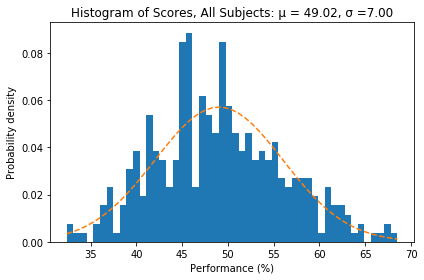

In [6]:
num_bins = 50
fig, ax = plt.subplots()
df = df_no_sim

# the histogram of the data
n, bins, patches = ax.hist(df['Scores'], num_bins, density=1)
mu = np.mean(df['Scores'])
sigma = np.std(df['Scores'])

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

ax.plot(bins, y, '--')
ax.set_xlabel('Performance (%)')
ax.set_ylabel('Probability density')
str_tmp = ('Histogram of Scores, All Subjects: \u03BC = {:05.2f}, \u03C3 ={:04.2f}'.format(mu, sigma))
ax.set_title(str_tmp)
# note: \u03BC = mu, and \u03C3 = sigma

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

Let's try plotting overlaying histograms, sessions 1, 2, and 3

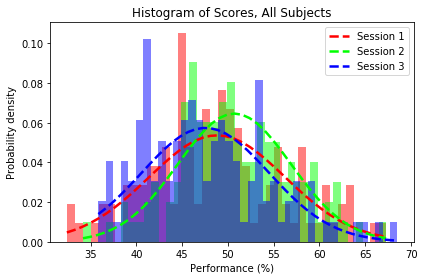

In [7]:
num_bins = 40
alpha = 0.5
colors = [[1,0,0,alpha],[0,1,0,alpha],[0,0,1,alpha]]
fig, ax = plt.subplots()
df = df_no_sim

for session_number in np.unique(df['SessionNumber']):
    tmp = df.drop(np.asarray(df.loc[df['SessionNumber']!=session_number].index))
    n, bins, patches = ax.hist(tmp['Scores'], num_bins, density=1, fc=colors[session_number-1])
    
    mu = np.mean(tmp['Scores'])
    sigma = np.std(tmp['Scores'])
    
    # add a 'best fit' line
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
         np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    ax.plot(bins, y, '--', linewidth=2.5, c=colors[session_number-1][:-1])

ax.set_xlabel('Performance (%)')
ax.set_ylabel('Probability density')
str_tmp = ('Histogram of Scores, All Subjects')
ax.legend(['Session 1','Session 2','Session 3'])
ax.set_title(str_tmp)

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

Let's try plotting by run

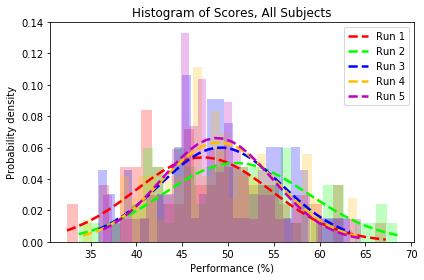

In [8]:
num_bins = 30
alpha = 0.25
colors = [[1,0,0,alpha],[0,1,0,alpha],[0,0,1,alpha],[1,0.75,0,alpha],[0.75,0,0.75,alpha]]
fig, ax = plt.subplots()
df = df_no_sim

for session_number in np.unique(df['RunNumber']):
    tmp = df.drop(np.asarray(df.loc[df['RunNumber']!=session_number].index))
    n, bins, patches = ax.hist(tmp['Scores'], num_bins, density=1, fc=colors[session_number-1])
    
    mu = np.mean(tmp['Scores'])
    sigma = np.std(tmp['Scores'])
    
    # add a 'best fit' line
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
         np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    ax.plot(bins, y, '--', linewidth=2.5, c=colors[session_number-1][:-1])

ax.set_xlabel('Performance (%)')
ax.set_ylabel('Probability density')
str_tmp = ('Histogram of Scores, All Subjects')
ax.legend(['Run 1','Run 2','Run 3','Run 4','Run 5'])
ax.set_title(str_tmp)

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

Separate group 1 and group 2

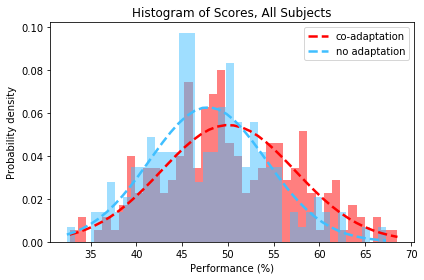

In [9]:
num_bins = 40
alpha = 0.5
colors = [[1,0,0,alpha],[0.25,0.75,1,alpha]]
fig, ax = plt.subplots()
df = df_no_sim
cnt = 0

for AdaptationScheme in np.unique(df['AdaptationScheme']):
    tmp = df.drop(np.asarray(df.loc[df['AdaptationScheme']!=AdaptationScheme].index))
    n, bins, patches = ax.hist(tmp['Scores'], num_bins, density=1, fc=colors[cnt])
    
    mu = np.mean(tmp['Scores'])
    sigma = np.std(tmp['Scores'])
    
    # add a 'best fit' line
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
         np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    ax.plot(bins, y, '--', linewidth=2.5, c=colors[cnt][:-1])
    cnt += 1

ax.set_xlabel('Performance (%)')
ax.set_ylabel('Probability density')
str_tmp = ('Histogram of Scores, All Subjects')
ax.legend([np.unique(df['AdaptationScheme'])[0],np.unique(df['AdaptationScheme'])[1]])
ax.set_title(str_tmp)

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

Let's include simulated TL adaptation

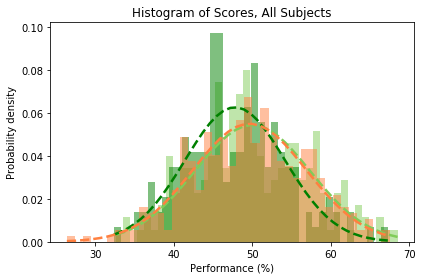

In [15]:
num_bins = 40
alpha = 0.5
colors = [[0.5,0.8,0.35,alpha],[0,0.5,0,alpha],[1,0.5,0.25,alpha]]
fig, ax = plt.subplots()
df = df_orig_TL
cnt = 0

for AdaptationScheme in np.unique(df['AdaptationScheme']):
    tmp = df.drop(np.asarray(df.loc[df['AdaptationScheme']!=AdaptationScheme].index))
    n, bins, patches = ax.hist(tmp['Scores'], num_bins, density=1, fc=colors[cnt])
    
    mu = np.mean(tmp['Scores'])
    sigma = np.std(tmp['Scores'])
    
    # add a 'best fit' line
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
         np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    ax.plot(bins, y, '--', linewidth=2.5, c=colors[cnt][:-1])
    cnt += 1

ax.set_xlabel('Performance (%)')
ax.set_ylabel('Probability density')
str_tmp = ('Histogram of Scores, All Subjects')
"""
ax.legend([np.unique(df['AdaptationScheme'])[0],np.unique(df['AdaptationScheme'])[1],np.unique(df['AdaptationScheme'])[2]],
         loc='upper left')
         """
ax.set_title(str_tmp)

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

## Let's also load in transfer learning data

In [11]:
data_files = glob.glob('*_all_scores_for_2-way_ANOVA_sessions_general_model.sav.mat')
data_files

['2019-04-06-14-22-49_all_scores_for_2-way_ANOVA_sessions_general_model.sav.mat']

In [12]:
# Load in the most recent file
mat_contents = sio.loadmat(data_files[-1])

In [13]:
# Format data
all_scores = mat_contents['all_scores_export']
all_scores = all_scores[0]
ModelType = mat_contents['ModelType']
SessionNumber = mat_contents['SessionNumber']
RunNumber = mat_contents['RunNumber']
Subjects = mat_contents['Subject']
Handedness = mat_contents['Handedness']
Age = mat_contents['Age']
Age = Age[0]

# Convert strings 'Session 1' into just 1, etc.
SessionNumber_int = list()
RunNumber_int = list()
for i in range(0,len(SessionNumber)):
    string_tmp = SessionNumber[i]
    x = [int(s) for s in string_tmp.split() if s.isdigit()]
    SessionNumber_int.append(x[0])
    
    string_tmp = RunNumber[i]
    x = [int(s) for s in string_tmp.split() if s.isdigit()]
    RunNumber_int.append(x[0])

# Remove trailing white spaces
ModelType_clean = list()
Handedness_clean = list()
for i in range(0,len(ModelType)):
    string_tmp = ModelType[i]
    ModelType_clean.append(string_tmp.rstrip())
    
    string_tmp = Handedness[i]
    Handedness_clean.append(string_tmp.rstrip())

# Save into dataframe
df_all_transfer = pd.DataFrame({'Scores':all_scores,
                  'ModelType':ModelType_clean,
                  'SessionNumber':SessionNumber_int,
                  'RunNumber':RunNumber_int,
                  'Subjects':Subjects,
                  'Handedness':Handedness_clean,
                  'Age':Age})
df_all_transfer.head()

,Scores,ModelType,SessionNumber,RunNumber,Subjects,Handedness,Age
0,49.557522,no adaptation,1,1,a1e6c0,R,32
1,38.938053,simulated TL adaptation,1,1,a1e6c0,R,32
2,48.695652,no adaptation,1,2,a1e6c0,R,32
3,52.380952,simulated TL adaptation,1,2,a1e6c0,R,32
4,40.170940,no adaptation,1,3,a1e6c0,R,32


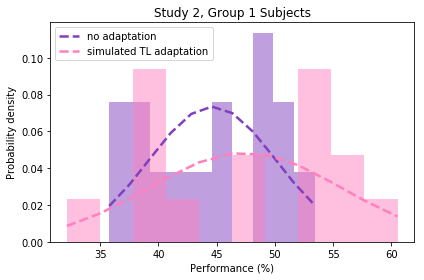

In [14]:
num_bins = 10
alpha = 0.5
colors = [[0.5,0.25,0.75,alpha],[1,0.5,0.75,alpha]]
fig, ax = plt.subplots()
df = df_all_transfer
cnt = 0

for ModelType in np.unique(df['ModelType']):
    tmp = df.drop(np.asarray(df.loc[df['ModelType']!=ModelType].index))
    n, bins, patches = ax.hist(tmp['Scores'], num_bins, density=1, fc=colors[cnt])
    
    mu = np.mean(tmp['Scores'])
    sigma = np.std(tmp['Scores'])
    
    # add a 'best fit' line
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
         np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    ax.plot(bins, y, '--', linewidth=2.5, c=colors[cnt][:-1])
    cnt += 1

ax.set_xlabel('Performance (%)')
ax.set_ylabel('Probability density')
str_tmp = ('Study 2, Group 1 Subjects')
ax.legend([np.unique(df['ModelType'])[0],np.unique(df['ModelType'])[1]])
ax.set_title(str_tmp)

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()